# TASK

Detection of epileptic seizures from electroencephalogram (EEG) data - feature extraction and binary classification.

EEG reads electrical signals from the brain and helps understand how active the brain is at any given moment.

An epileptic seizure is characterized by abnormal brain activity, which can be attempted to be detected using EEG.

# LIBs

In [1]:
import numpy as np
np.random.seed(0)
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'C:\Users\HP\Downloads\PROJECTS\epilepsy project\epilepsy project code 2\data.csv')

In [4]:
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


# Preprocessing

In [5]:
target = 'y'
columns = df.columns.to_list()

predictors = columns[1:]
predictors.remove(target)

print(target)
print(predictors)

y
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', '

### Target Information

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity 

In [6]:
df[target][df[target] > 1] = 0
y = df[target]

### Drop duplicates

In [7]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(11500, 180)
(11500, 180)


### Missing Data

In [8]:
df.isnull().sum().sum()

0

### Data Normalization

In [9]:
X = pd.DataFrame(
        MinMaxScaler().fit_transform(df[predictors].T).T,
        columns=predictors,
        index=df.index
    )

X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,0.815686,0.923529,1.000000,0.988235,0.927451,0.796078,0.658824,0.533333,0.486275,0.476471,...,0.566667,0.517647,0.521569,0.490196,0.400000,0.349020,0.301961,0.323529,0.388235,0.450980
1,0.943024,0.941229,0.929565,0.918349,0.913414,0.911171,0.907582,0.891880,0.879318,0.873934,...,0.845222,0.843428,0.837147,0.835352,0.838044,0.840287,0.839838,0.838941,0.834006,0.827725
2,0.456311,0.422330,0.383495,0.432039,0.456311,0.436893,0.334951,0.257282,0.199029,0.155340,...,0.752427,0.888350,0.922330,0.844660,0.703883,0.553398,0.466019,0.441748,0.441748,0.436893
3,0.000000,0.048193,0.108434,0.156627,0.192771,0.120482,0.036145,0.060241,0.216867,0.313253,...,0.301205,0.277108,0.289157,0.301205,0.337349,0.240964,0.337349,0.397590,0.433735,0.481928
4,0.519337,0.209945,0.027624,0.005525,0.138122,0.303867,0.480663,0.569061,0.453039,0.243094,...,0.624309,0.591160,0.580110,0.502762,0.392265,0.342541,0.209945,0.110497,0.077348,0.165746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,0.375000,0.375000,0.368421,0.348684,0.282895,0.243421,0.223684,0.243421,0.223684,0.197368,...,0.651316,0.618421,0.625000,0.598684,0.552632,0.513158,0.401316,0.276316,0.210526,0.203947
11496,0.396973,0.438882,0.484284,0.541327,0.615832,0.697322,0.738068,0.731083,0.676368,0.610012,...,0.342258,0.376019,0.413271,0.443539,0.467986,0.483120,0.507567,0.541327,0.587893,0.649593
11497,0.492891,0.454976,0.364929,0.350711,0.473934,0.549763,0.554502,0.383886,0.445498,0.492891,...,0.227488,0.118483,0.199052,0.137441,0.132701,0.109005,0.284360,0.417062,0.421801,0.388626
11498,0.383607,0.432787,0.485246,0.475410,0.508197,0.554098,0.537705,0.577049,0.586885,0.609836,...,0.888525,0.911475,0.957377,1.000000,0.983607,0.895082,0.796721,0.737705,0.708197,0.695082


# EDA(Exploratory data analysis)

<Axes: xlabel='y', ylabel='Count'>

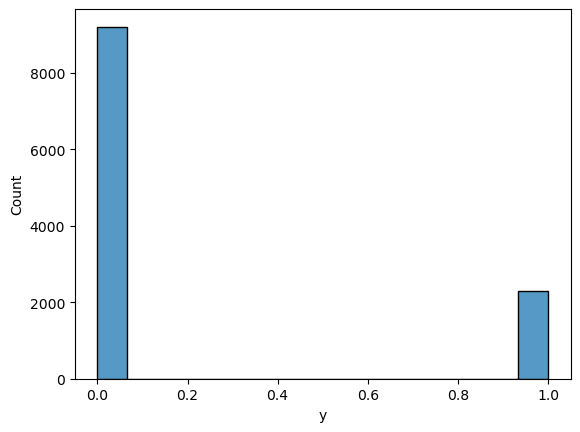

In [10]:
sns.histplot(y)

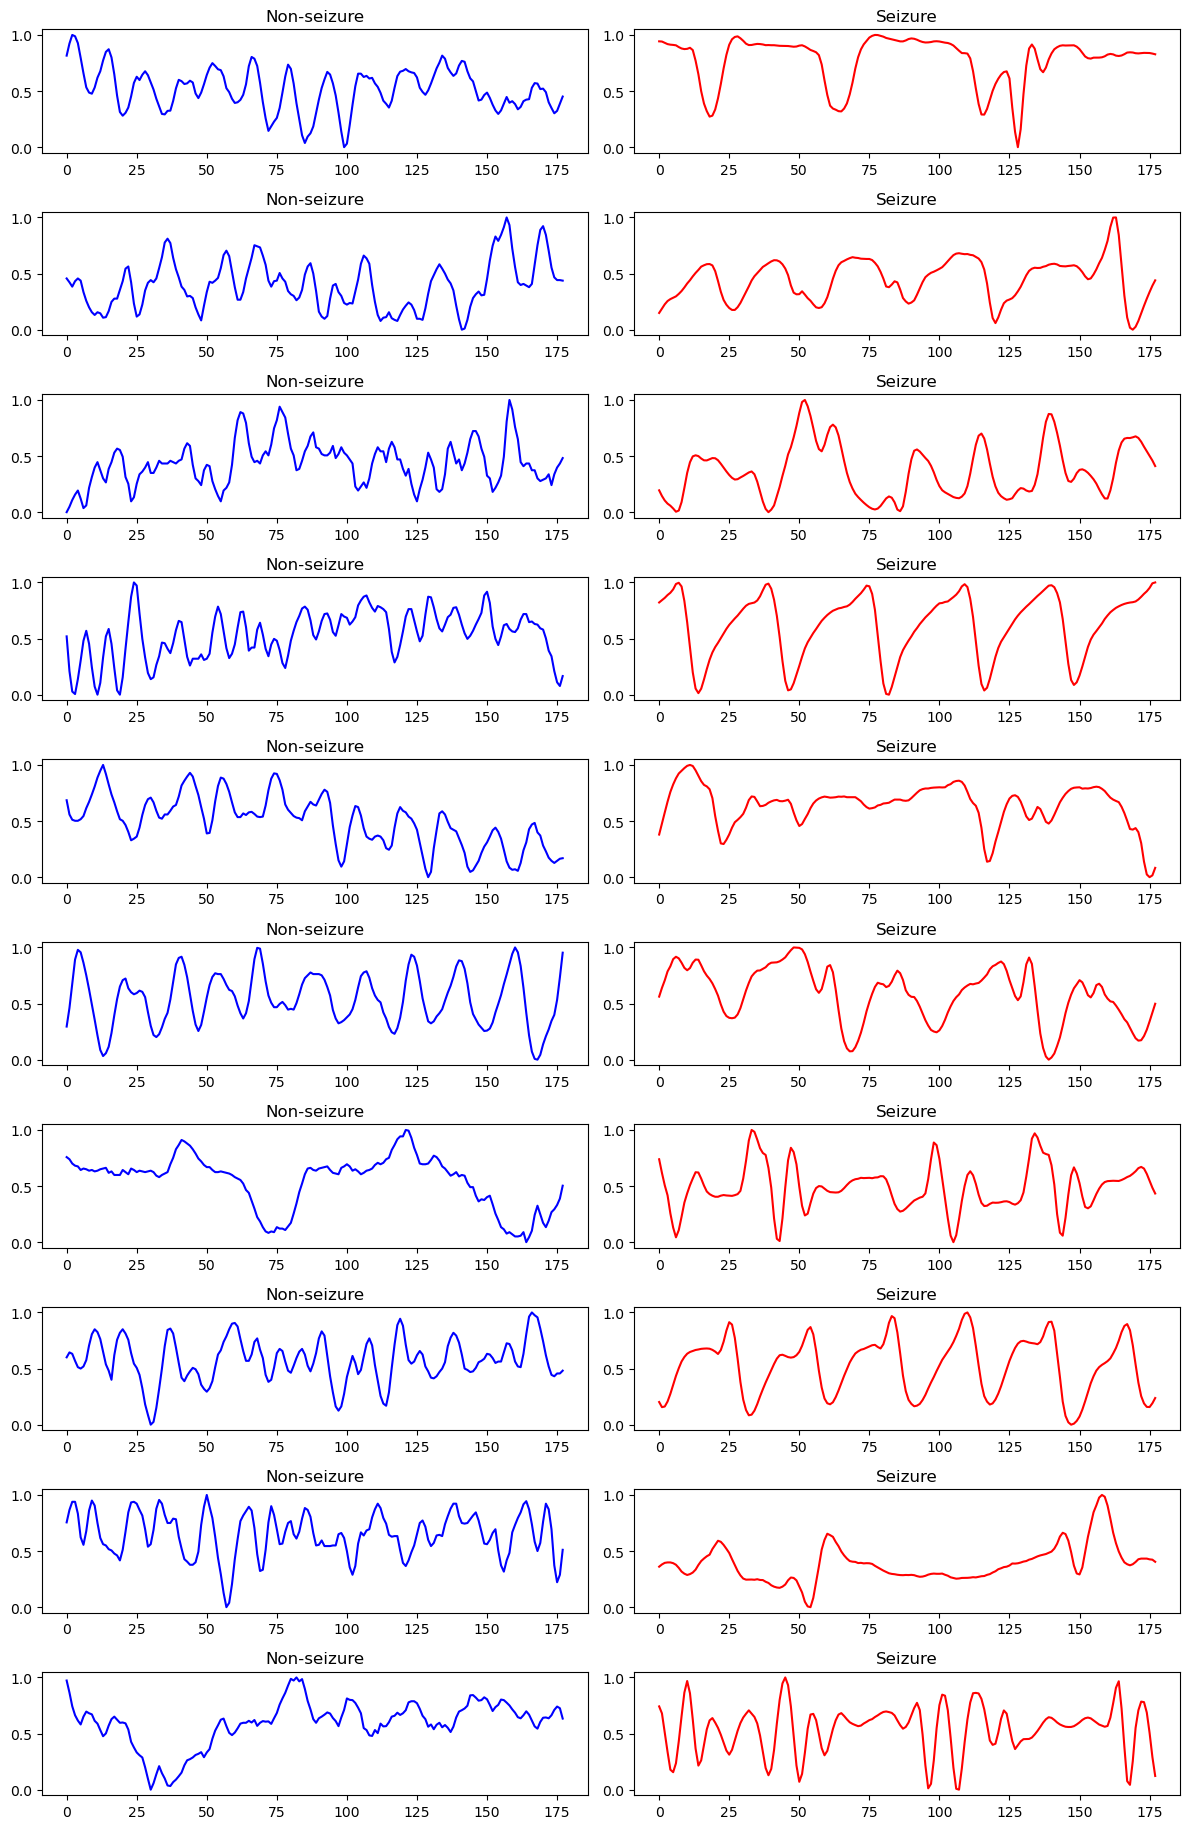

In [14]:
fig, axes = plt.subplots(10, 2, figsize=(12, 20))

X_negative = X[y==0]
X_positive = X[y==1]

for i in range(10):
    axes[i, 0].plot(X_negative.iloc[i].values, color='blue')
    axes[i, 0].set_title('Non-seizure')

for i in range(10):
    axes[i, 1].plot(X_positive.iloc[i].values, color='red')
    axes[i, 1].set_title('Seizure')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# EDA Conclusion 

The data is imbalanced but well-prepared.

No missing values or duplicates.

In signals with epilepsy, there is a predominance of low frequencies.

### Train-Test Split

In [15]:
train_X, test_X, train_y, test_y = train_test_split(X, 
                                                    y.values, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y.values)

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(9200, 178) (2300, 178) (9200,) (2300,)


# Baseline

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1840
           1       0.00      0.00      0.00       460

    accuracy                           0.80      2300
   macro avg       0.40      0.50      0.44      2300
weighted avg       0.64      0.80      0.71      2300


Random Forest Results:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1840
           1       0.94      0.31      0.47       460

    accuracy                           0.86      2300
   macro avg       0.90      0.65      0.69      2300
weighted avg       0.87      0.86      0.83      2300



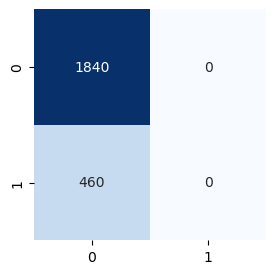

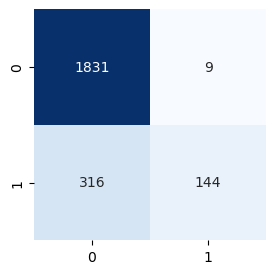

In [16]:
from sklearn.ensemble import RandomForestClassifier

class Modeling:
    def report(self, test, pred):
        print(classification_report(test, pred))
        plt.figure(figsize=(3,3))
        cm = confusion_matrix(test, pred)
        sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', cbar=False);
    
    def train_Log_Reg(self, train_X, test_X, train_y, test_y):
        clf_LR = LogisticRegression()
        clf_LR.fit(train_X, train_y)
        pred_LR = clf_LR.predict(test_X)
        print("Logistic Regression Results:")
        self.report(test_y, pred_LR)

    def train_RF(self, train_X, test_X, train_y, test_y):
        clf_RF = RandomForestClassifier(random_state=0)
        clf_RF.fit(train_X, train_y)
        pred_RF = clf_RF.predict(test_X)
        print("\nRandom Forest Results:")
        self.report(test_y, pred_RF)


# create object of the class
ml = Modeling()

# run both models
ml.train_Log_Reg(train_X, test_X, train_y, test_y)
ml.train_RF(train_X, test_X, train_y, test_y)

# FFT(Fast Fourier Transform)

In [17]:
# number of predictors (signal length per sample)
n = len(predictors)

# since each sample is 1 second long
fs = int(n / 1)
print("Sampling frequency:", fs)

# frequency bins
frequencies = np.fft.fftfreq(n, 1/fs)
positive_freqs = frequencies[:len(frequencies)//2]  # only positive frequencies

# use frequency values as column names
features = np.array(positive_freqs, dtype=int).astype(str).tolist()

Sampling frequency: 178


In [18]:
fft_train_X = pd.DataFrame(index=train_X.index, columns=features)
fft_test_X = pd.DataFrame(index=test_X.index, columns=features)

In [19]:
for idx in fft_train_X.index:
    signal = train_X.loc[idx].values
    fft_result = np.fft.fft(signal)
    amplitudes = np.abs(fft_result)
    fft_train_X.loc[idx] = amplitudes[:len(amplitudes)//2]

In [20]:
for idx in fft_test_X.index:
    signal = test_X.loc[idx].values
    fft_result = np.fft.fft(signal)
    amplitudes = np.abs(fft_result)
    fft_test_X.loc[idx] = amplitudes[:len(amplitudes)//2]

In [21]:
print("FFT Train shape:", fft_train_X.shape)
print("FFT Test shape:", fft_test_X.shape)

FFT Train shape: (9200, 89)
FFT Test shape: (2300, 89)


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1840
           1       0.90      0.83      0.86       460

    accuracy                           0.95      2300
   macro avg       0.93      0.90      0.92      2300
weighted avg       0.95      0.95      0.95      2300



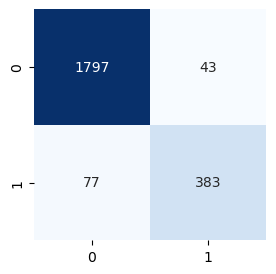

In [22]:
ml.train_Log_Reg(fft_train_X, fft_test_X, train_y, test_y)


Random Forest Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1840
           1       0.97      0.83      0.89       460

    accuracy                           0.96      2300
   macro avg       0.96      0.91      0.93      2300
weighted avg       0.96      0.96      0.96      2300



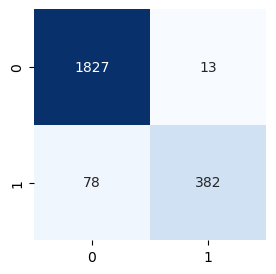

In [23]:
ml.train_RF(fft_train_X, fft_test_X, train_y, test_y)

# FFT Conclusion

#Using FFT, converted EEG signals to the frequency domain.

-Seizures showed stronger activity in low-frequency bands.

-Logistic Regression gave a solid baseline, but Random Forest performed better on FFT features.

-Overall, FFT improved classification compared to raw signals, though recall for seizures still needs improvement.

#Deep learning models like CNNs could be explored for this task in future work. However, due to resource constraints and for interpretability, I focused on classical ML methods (FFT + Logistic Regression / Random Forest).

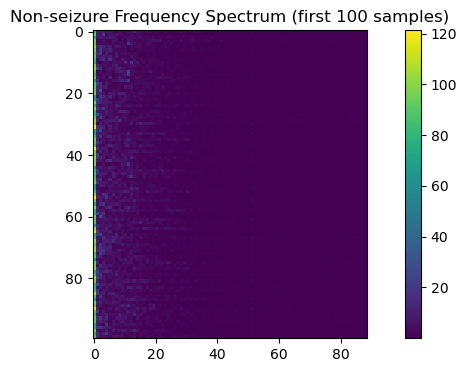

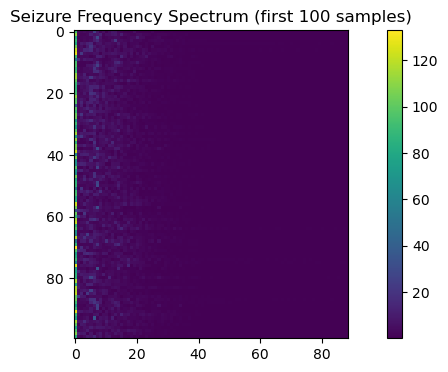

In [24]:
# Non-seizure frequency spectrum
plt.figure(figsize=(10,4))
plt.title("Non-seizure Frequency Spectrum (first 100 samples)")
plt.imshow(np.array(fft_test_X[test_y == 0].values[:100, :], dtype=float))
plt.colorbar()
plt.show()

# Seizure frequency spectrum
plt.figure(figsize=(10,4))
plt.title("Seizure Frequency Spectrum (first 100 samples)")
plt.imshow(np.array(fft_test_X[test_y == 1].values[:100, :], dtype=float))
plt.colorbar()
plt.show()


### Other Advanced Approaches (Not Implemented)


#Signal Reconstruction from Important Frequencies: 

 Advanced methods can reconstruct EEG signals using frequency importance weighting.  
  In this project, I focused instead on direct FFT feature extraction for simplicity and interpretability.  

#Wavelet Decomposition:

 Wavelets decompose signals into multiple frequency bands and provide time-frequency resolution.  
  Although powerful, I chose to keep my pipeline FFT-based for clarity.  

#TSFEL (Time Series Feature Extraction Library):

 TSFEL automatically extracts hundreds of statistical features from time-series data.  
  I skipped this step to avoid overcomplicating the project and to ensure reproducibility with a simpler model.  

### Final Conclusion

1. During EDA, I hypothesized that epileptic signals are dominated by low frequencies.  
   This hypothesis was confirmed in the FFT analysis.  

2. Comparing methods:  
   - Baseline (raw signals + Logistic Regression / Random Forest)** gave reasonable accuracy but poor seizure recall.  
   - FFT Features** improved performance significantly, with Random Forest achieving high precision and recall for seizures.  

3. Takeaways:  
   - FFT is an effective and interpretable feature extraction technique for EEG-based epilepsy prediction.  
   - Random Forest performed best, balancing accuracy and recall for seizure detection.  

### Future Scope
- Extend this work with **deep learning (1D-CNN or RNN)** for automatic feature extraction.  
- Build a **simple UI** to allow users to upload EEG data and get predictions in real-time.  
- Explore larger clinical datasets to validate model robustness.  
